In [90]:
from pymongo import MongoClient
import json
import pandas as pd
import numpy as np

In [91]:
df = pd.read_csv('Resources/data.csv')
df.head(2)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN


In [92]:
df.drop(columns='Unnamed: 32', inplace = True)

array([[<AxesSubplot:title={'center':'radius_mean'}>]], dtype=object)

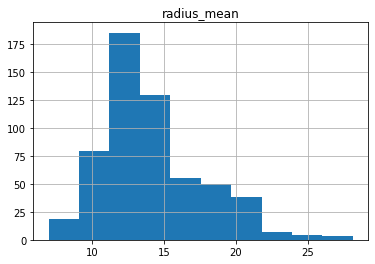

In [93]:
df.hist('radius_mean')

In [94]:
precentile_list=list(np.percentile(df.radius_mean, [20,40,60,80,100]))

In [95]:
percentile_list

[11.366, 12.726, 14.058000000000002, 17.067999999999998, 28.11]

In [96]:
df1 = df.loc[df.radius_mean < percentile_list[0]]
df1.to_json('Resources/t1.json')
df2 = df.loc[(df.radius_mean >=percentile_list[0])&(df.radius_mean<=percentile_list[1])]
df2.to_json('Resources/t2.json')
df3 = df.loc[(df.radius_mean >=percentile_list[0])&(df.radius_mean<=percentile_list[1])]
df3.to_json('Resources/t3.json')
df4 = df.loc[(df.radius_mean >=percentile_list[2])&(df.radius_mean<=percentile_list[3])]
df4.to_json('Resources/t4.json')
df5 = df.loc[df.radius_mean >percentile_list[3]]
df5.to_json('Resources/t5.json')

In [97]:
client=MongoClient('mongodb://localhost:27017')
db = client['DBCancer']

In [98]:
def make_col(jsonName, colName):
    col = db[colName]
    if col:
        col.drop()
    with open(jsonName, 'r') as file:
        file_data = json.load(file)
        if isinstance(file_data, list):
            col.insert_many(file_data)
        else: col.insert_one(file_data)
make_col('Resources/t1.json', 't1')
make_col('Resources/t2.json', 't2')
make_col('Resources/t3.json', 't3')
make_col('Resources/t4.json', 't4')
make_col('Resources/t5.json', 't5')

In [99]:
data = db.t2.find_one().items()
for index,(key,value) in enumerate(data):
    if index == 3:
        print(key, '::', value)

radius_mean :: {'3': 11.42, '5': 12.45, '9': 12.46, '31': 11.84, '48': 12.05, '50': 11.76, '52': 11.94, '55': 11.52, '64': 12.68, '74': 12.31, '80': 11.45, '84': 12.0, '88': 12.36, '96': 12.18, '98': 11.6, '102': 12.18, '106': 11.64, '107': 12.36, '111': 12.63, '115': 11.93, '120': 11.41, '130': 12.19, '136': 11.71, '137': 11.43, '142': 11.43, '145': 11.9, '146': 11.8, '155': 12.25, '158': 12.06, '160': 11.75, '163': 12.34, '170': 12.32, '183': 11.41, '187': 11.71, '188': 11.81, '189': 12.3, '193': 12.34, '200': 12.23, '204': 12.47, '211': 11.84, '216': 11.89, '228': 12.62, '241': 12.42, '249': 11.52, '251': 11.5, '275': 11.89, '281': 11.74, '285': 12.58, '286': 11.94, '289': 11.37, '293': 11.85, '294': 12.72, '297': 11.76, '301': 12.46, '304': 11.46, '305': 11.6, '310': 11.7, '313': 11.54, '315': 12.49, '316': 12.18, '319': 12.43, '324': 12.2, '325': 12.67, '327': 12.03, '334': 12.3, '344': 11.71, '346': 12.06, '348': 11.47, '349': 11.95, '350': 11.66, '355': 12.56, '360': 12.54, '367

In [111]:
db.t2.find({$and:[{'radius_mean':'3'}, {'radius_mean':'559'}]})

SyntaxError: invalid syntax (<ipython-input-111-a01f1887401b>, line 1)

In [18]:
def str_count(strng, letter,l):
    # Your code here ;)
   print(strng.count(letter,l))

str_count('hello', 'e',1)

1
